# Bitome 2.0 Tutorial

This notebook contains a broad overview of the new Bitome codebase, used for organizing, analyzing, and visualizing all features associated with a prokaryotic genome sequence. 

Features are represented in tables, organized by feature type, and stored as pandas DataFrames for ease of use and storage. 

## Input/Output

In [1]:
import sys

sys.path.append('../../bitome2/')
sys.path.append('../')

from bitome.core import Bitome
from feature_functions import *

The most basic input to a `Bitome` object is a reference sequence, in either FASTA or GenBank format. If GenBank format is provided, you have the option to automagically parse GenBank feature information into tabular format for further use in the bitome. 

### FASTA

In [2]:
bitome_fasta = Bitome('../../bitome2/data/example/NC_000913.3.fasta')

With FASTA input, no feature tables are populated by default; we just have a reference sequence:

In [3]:
print(f'Sequence 1st 50: {bitome_fasta.sequence[:50]}')
print(f'Description: {bitome_fasta.description}')
print(f'Sequence ID: {bitome_fasta.reference_id}')

Sequence 1st 50: AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAA
Description: NC_000913.3 Escherichia coli str. K-12 substr. MG1655, complete genome
Sequence ID: NC_000913.3


### GenBank

With GenBank input, by default, gene, protein, and miscellaneous feature tables are parsed and prepared:

In [4]:
bitome_genbank = Bitome('../../bitome2/data/example/NC_000913.3.gb')

In [5]:
bitome_genbank.gene_table.head()

,left,right,strand,pseudo,name
locus_tag,,,,,
b0001,190,255,1,False,thrL
b0002,337,2799,1,False,thrA
b0003,2801,3733,1,False,thrB
b0004,3734,5020,1,False,thrC
b0005,5234,5530,1,False,yaaX


In [6]:
bitome_genbank.protein_table.head()

,left,right,strand,name
locus_tag,,,,
b0001,190,255,1,thr operon leader peptide
b0002,337,2799,1,Bifunctional aspartokinase/homoserine dehydrog...
b0003,2801,3733,1,homoserine kinase
b0004,3734,5020,1,L-threonine synthase
b0005,5234,5530,1,DUF2502 family putative periplasmic protein


In [7]:
bitome_genbank.misc_feature_table.head()

,left,right,strand,type
locus_tag,,,,
NC_000913.3_1,5565,5669,1,repeat_region
NC_000913.3_2,15387,16731,1,mobile_element
b4413,16952,17006,1,ncRNA
NC_000913.3_3,19796,20563,-1,mobile_element
NC_000913.3_4,25710,25795,1,repeat_region


Automatic GenBank parsing can be controlled with the `use_genbank` option:

In [8]:
bitome_genbank_no_auto = Bitome('../../bitome2/data/example/NC_000913.3.gb', use_genbank=False)
bitome_genbank_no_auto.gene_table.head()

,left,right,strand
locus_tag,,,


Use a GenBank file automatically created by the prokka annotation tool:

In [9]:
bitome_genbank_prokka = Bitome('../../bitome2/data/example/U00096_prokka.gb')
bitome_genbank_prokka.gene_table.head()

,left,right,strand,pseudo,name
locus_tag,,,,,
U00096_00001,337,2799,1,False,thrA
U00096_00002,2801,3733,1,False,thrB
U00096_00003,3734,5020,1,False,thrC
U00096_00004,5234,5530,1,False,None
U00096_00005,5683,6459,-1,False,None


In [10]:
bitome_genbank_prokka.misc_feature_table.head()

,left,right,strand,type
locus_tag,,,,
U00096_00197,225381,225457,1,tRNA
U00096_00198,225500,225575,1,tRNA
U00096_00199,228928,229004,1,tRNA
U00096_00209,236931,237007,1,tRNA
U00096_00240,262871,262946,1,tRNA


### Feature Tables

All other feature data is expected in tabular format. Gene and protein data may also be provided in this way; let's focus on these as examples. 

Looking above, we see the expected format for the feature tables based on the auto-parsed GenBank tables.

The following columns are required for ALL feature tables, as they enable localization of the feature:
- left
- right
- strand [can have NA]

Additional columns that other optional functionalities will use include:
- name
- locus_tag

Certain input tables also require particular feature-specific columns (i.e. the TU table requires a 'tss' column)

Let's use the FASTA reference sequence but tell the Bitome about some genes and proteins:

In [13]:
bitome_fasta_tables = Bitome(
    '../../bitome2/data/example/NC_000913.3.fasta',
    gene_table='../../bitome2/data/example/gene_table_good.csv',
    protein_table='../../bitome2/data/example/protein_table_good.csv',
)
bitome_fasta_tables.gene_table.head()

,name,left,right,strand
locus_tag,,,,
b0001,thrL,190,255,1
b0002,thrA,337,2799,1
b0003,thrB,2801,3733,1
b0004,thrC,3734,5020,1
b0005,yaaX,5234,5530,1


Required columns are error-checked:

In [14]:
bitome_fasta_tables = Bitome(
    '../bitome2/data/example/NC_000913.3.fasta',
    gene_table='../bitome2/data/example/gene_table_bad.csv'
)

FileNotFoundError: [Errno 2] No such file or directory: '../bitome2/data/example/NC_000913.3.fasta'

Additional table inputs work in much the same way:

In [17]:
bitome_many_tables = Bitome(
    '../../bitome2/data/example/NC_000913.3.fasta',
    gene_table='../../bitome2/data/example/gene_table_good.csv',
    protein_table='../../bitome2/data/example/protein_table_good.csv',
    tu_table='../../bitome2/data/example/tu.csv',
    tss_table='../../bitome2/data/example/tss.csv',
    riboswitch_table='../../bitome2/data/example/riboswitch.csv',
    terminator_table='../../bitome2/data/example/terminator.csv',
    rbs_table='../../bitome2/data/example/rbs.csv',
)

In [18]:
bitome_many_tables.tu_table.head()

,name,left,right,strand,tss,sigma_factor,box10_left,box10_right,box35_left,box35_right
locus_tag,,,,,,,,,,
ECK120008913,astCADBE,1825955,1832013,reverse,1832013.0,Sigma70,1832022.0,1832027.0,1832047.0,1832052.0
ECK120008914,astCADBE,1825955,1832327,reverse,1832044.0,Sigma54,1832054.0,1832058.0,1832065.0,1832070.0
ECK120008915,astCADBE,1825955,1832039,reverse,1832039.0,Sigma38,1832046.0,1832056.0,1832070.0,1832075.0
ECK120008916,nrdHIEF,2800586,2804461,forward,2800656.0,NaN,NaN,NaN,NaN,NaN
ECK120008917,cpxPQ,4105726,4106387,forward,4105785.0,NaN,NaN,NaN,NaN,NaN


In [19]:
bitome_many_tables._all_tables

{'gene':            name     left    right  strand
 locus_tag                                
 b0001      thrL      190      255       1
 b0002      thrA      337     2799       1
 b0003      thrB     2801     3733       1
 b0004      thrC     3734     5020       1
 b0005      yaaX     5234     5530       1
 ...         ...      ...      ...     ...
 b4399      creC  4636696  4638120       1
 b4400      creD  4638178  4639530       1
 b4401      arcA  4639590  4640306      -1
 b4402      yjjY  4640402  4640542       1
 b4403      yjtD  4640942  4641628       1
 
 [4355 rows x 4 columns],
 'protein':            left  right  strand  \
 locus_tag                        
 b0001       190    255       1   
 b0002       337   2799       1   
 b0003      2801   3733       1   
 b0004      3734   5020       1   
 b0005      5234   5530       1   
 b0006      5683   6459      -1   
 b0007      6529   7959      -1   
 b0008      8238   9191       1   
 b0009      9306   9893       1   
 b0010   

## Utilities

### Get Sequence

Features can be inputted to utility functions as rows sliced from dataframes

In [20]:
bitome_genbank.get_feature_sequence(bitome_genbank.gene_table.loc['b0001'])

Seq('ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAAC...TGA')

In [21]:
bitome_genbank.get_sequence(100, 200, -1)

Seq('ATGCGTTTCATGGATGTTGTGTACTCTGTAATTTTTATCTGTCTGTGCGCTATG...TAA')

### Inter-Feature Distance

In [22]:
bitome_genbank.inter_feature_distance(
    bitome_genbank.gene_table.loc['b0001'], bitome_genbank.gene_table.loc['b1000']
)

1063585

### Features in Region

This helpful function returns a DataFrame of all features in a given range

In [23]:
bitome_genbank.features_in_range(1, 10000)

,left,right,strand,pseudo,name,type
locus_tag,,,,,,
b0001,190,255,1,False,thrL,gene
b0002,337,2799,1,False,thrA,gene
b0003,2801,3733,1,False,thrB,gene
b0004,3734,5020,1,False,thrC,gene
b0005,5234,5530,1,False,yaaX,gene
b0006,5683,6459,-1,False,yaaA,gene
b0007,6529,7959,-1,False,yaaJ,gene
b0008,8238,9191,1,False,talB,gene
b0009,9306,9893,1,False,mog,gene


## Visualization

### Genome Browser

Prepare a genome browser-style figure showing an extracted region's features

This is a bit buggy and needs improvement

<AxesSubplot:>

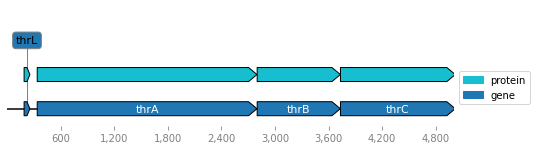

In [25]:
bitome_genbank.view_region(1, 5000)

<AxesSubplot:>

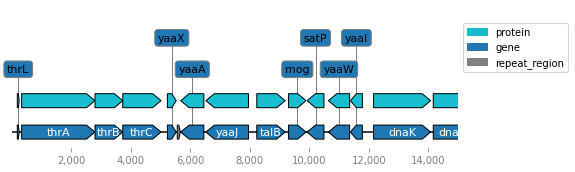

In [26]:
bitome_genbank.view_region(1, 15000)

## Promoters and Motifs

### General Motif Matching

The most low-level motif function can find and rank motif matches to a particular position-specific scoring matrix (PSSM) within a specified genomic region:

In [28]:
# modify legacy PSSM format into Bitome 2 format
tf_pwm_db = rpwm('../data/motif_pwm_db.txt')
argp_pwm_old = tf_pwm_db['ArgP']
argp_pssm = {base: [pos_dict[base] for pos_dict in argp_pwm_old] for base in 'ATCG'}

Can we find known ArgP binding sites according to RegulonDB?
28252 	28271, and 28272 	28291

In [29]:
bitome_genbank.motif_search(28000, 29000, +1, argp_pssm, n_best_matches=5)

,match_sequence,log_odds,left,right
0,TTTATCATTAATTTCTAAT,6.2,28273,28291
1,TTTCACTGATATCCCTCCC,4.2,28252,28270
2,ATCTTCTTTACTGGGCAGC,3.5,28496,28514
3,CGTTAACGTCATGCTTAAG,3.4,28769,28787
4,CTTTGCTGCCAATTTTAGC,2.1,28745,28763


We also have a convenient wrapper for finding binding sites in range of a TSS:

### Motif Matching near TSS

In [30]:
bitome_genbank.promoter_motif_search(28288, 1, argp_pssm, n_best_matches=5)

,match_sequence,log_odds,left,right
0,TTTATCATTAATTTCTAAT,6.2,28273,28291
1,TTTCACTGATATCCCTCCC,4.2,28252,28270
2,AATTTCTAATTATCAGCGT,2.0,28282,28300
3,TTAATTTCTAATTATCAGC,0.7,28280,28298
4,GCATGCAGTCATTCATCGA,0.6,28225,28243


### Featurizing Promoter

Note: not using actual sigma factor motifs, so the scores are bad

In [31]:
bitome_genbank.featurize_promoter(28288, 1, minus_10_motif=argp_pssm, minus_35_motif=argp_pssm,
                                 usr=(-65, -45))

{'m10_sequence': 'CCTGTTTATCATTAATTTC',
 'm10_score': -4.8,
 'm10_location': -10.0,
 'm35_sequence': 'TCATGCCTTTCACTGATAT',
 'm35_score': -5.499999999999999,
 'm35_location': -34.0,
 'spacer_sequence': Seq('TCCCTCC'),
 'spacer_length': 7,
 'spacer_at': 0.2857142857142857,
 'usr_at': 0.5238095238095237,
 'dsr_ag': 0.3333333333333333}

In [32]:
from bitome.util import create_motif

In [33]:
create_motif(['ATCG', 'ATCC', 'ATCT']).pwm

{'A': (1.0, 0.0, 0.0, 0.0),
 'C': (0.0, 0.0, 1.0, 0.3333333333333333),
 'G': (0.0, 0.0, 0.0, 0.3333333333333333),
 'T': (0.0, 1.0, 0.0, 0.3333333333333333)}